## The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

+ Optimize Data Types:

Choose appropriate data types: Select the most compact data types that can accurately represent your data. For example, use int8 for integers within -128 to 127, or float32 for floating-point numbers that don't require high precision.
Convert large objects: If you have columns containing large textual data, consider encoding techniques (e.g., label encoding for categorical features) or storing them separately.
+ Handle Missing Values:

Eliminate unnecessary missing values: Remove rows or columns with excessive missing data if they don't provide valuable information.
Choose memory-efficient representations: Opt for numpy.nan instead of string-based representations like "NaN" or "N/A". Consider using sparse data structures for large datasets with many missing values.
+ Reduce Data Redundancy:

Identify and remove duplicate rows: Eliminate completely identical rows to reduce memory usage.
Utilize compression techniques: Compress text-heavy columns using algorithms like LZ4 or zlib.
+ Feature Engineering and Selection:

Remove irrelevant features: Discard features that don't contribute significantly to your analysis.
Combine features: Create new features that effectively represent multiple existing features, potentially reducing dimensionality.
+ Downcast Data Types:

Automatically reduce memory usage: Use tools like Pandas' infer_objects() to automatically convert objects to more memory-efficient data types.
+ Load Data Incrementally:

Process in chunks: If you're dealing with massive datasets, load and process data in smaller chunks to avoid memory overload.
+ Consider Alternative Data Structures:

Sparse matrices: For datasets with many zeros, sparse matrices can significantly reduce memory usage.
Memory-mapped arrays: These arrays can handle large datasets without loading the entire dataset into memory at once.
The best approach depends on the specific characteristics of your dataset and analysis goals. Experiment with different techniques to find the optimal memory reduction strategy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle as pkl

In [7]:
with open("cleaned_df.pkl","rb") as f:
    cleaned_autos = pkl.load(f)  ## Reading the data from cleaned_df.pkl

In [8]:
df=cleaned_autos.copy()

In [10]:
df

,name,seller,model,brand,offerType,price,abtest,vehicleType,gearbox,powerPS,fuelType,kilometer,notRepairedDamage,yearOfRegistration,monthOfRegistration,postalCode,dateCrawled,dateCreated,lastSeen
0,Golf 3 1.6,private,golf,volkswagen,Offer,480,test,Other,Manual,0,petrol,150000,Other,1993,January,70435,2016-03-24 11:52:17,2016-03-24,2016-04-07 03:16:57
1,A5 Sportback 2.7 Tdi,private,Other,audi,Offer,18300,test,coupe,Manual,190,diesel,125000,Yes,2011,May,66954,2016-03-24 10:58:45,2016-03-24,2016-04-07 01:46:50
2,"Jeep Grand Cherokee ""Overland""",private,grand,jeep,Offer,9800,test,suv,Automatic,163,diesel,125000,Other,2004,August,90480,2016-03-14 12:52:21,2016-03-14,2016-04-05 12:47:46
3,GOLF 4 1 4 3TÜRER,private,golf,volkswagen,Offer,1500,test,compact car,Manual,75,petrol,150000,No,2001,June,91074,2016-03-17 16:54:04,2016-03-17,2016-03-17 17:40:17
4,Skoda Fabia 1.4 TDI PD Classic,private,fabia,skoda,Offer,3600,test,compact car,Manual,69,diesel,90000,No,2008,July,60437,2016-03-31 17:25:20,2016-03-31,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371522,Mitsubishi Cold,private,colt,mitsubishi,Offer,0,control,Other,Manual,0,petrol,150000,Yes,2005,July,2694,2016-03-21 09:50:58,2016-03-21,2016-03-21 10:42:49
371523,Suche t4 vito ab 6 sitze,private,Other,sonstige_autos,Offer,2200,test,Other,Unspecified,0,Other,20000,Other,2005,January,39576,2016-03-14 17:48:27,2016-03-14,2016-04-06 00:46:52
371524,Smart smart leistungssteigerung 100ps,private,fortwo,smart,Offer,1199,test,convertible,Automatic,101,petrol,125000,No,2000,March,26135,2016-03-05 19:56:21,2016-03-05,2016-03-11 18:17:12
371525,Volkswagen Multivan T4 TDI 7DC UY2,private,transporter,volkswagen,Offer,9200,test,bus,Manual,102,diesel,150000,No,1996,March,87439,2016-03-19 18:57:12,2016-03-19,2016-04-07 07:15:26


## What is the Average price of vehicle by fuel type and gearbox type.Give a plot

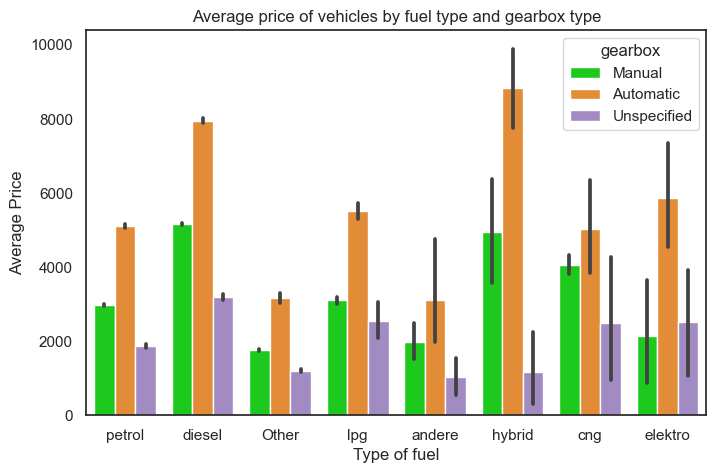

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Average price of vehicles by fuel type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type of fuel",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

## What is the Average price of vehicle by fuel type and gearbox type.Give a plot

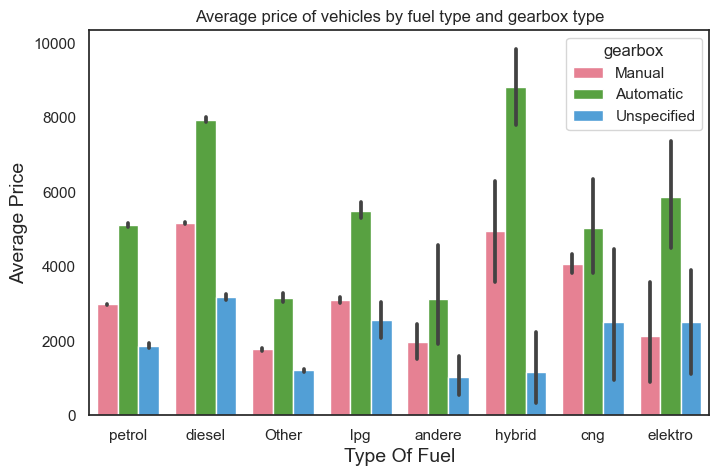

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
ax.set_title("Average price of vehicles by fuel type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

## What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

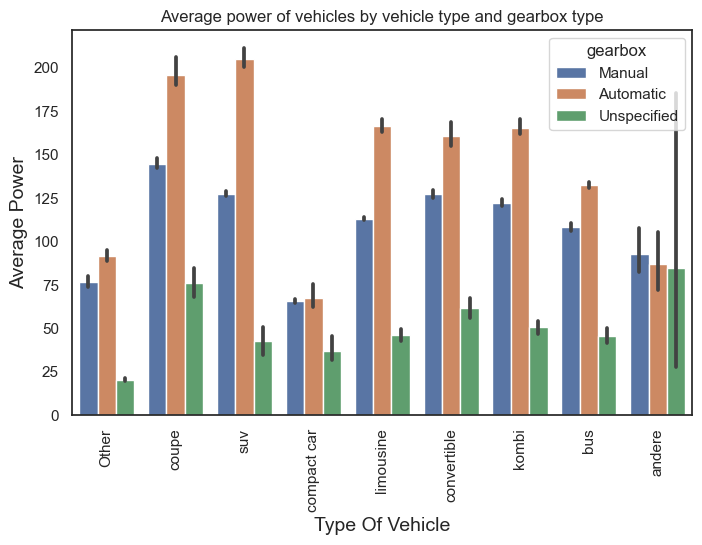

In [15]:
# barplot for price based on fuel type and gearbox type
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Average power of vehicles by vehicle type and gearbox type",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Power",fontdict= {'size':14})
plt.xticks(rotation=90)
plt.show()

In [17]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,1379
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,compact car,1626
4,volkswagen,limousine,3743


## What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

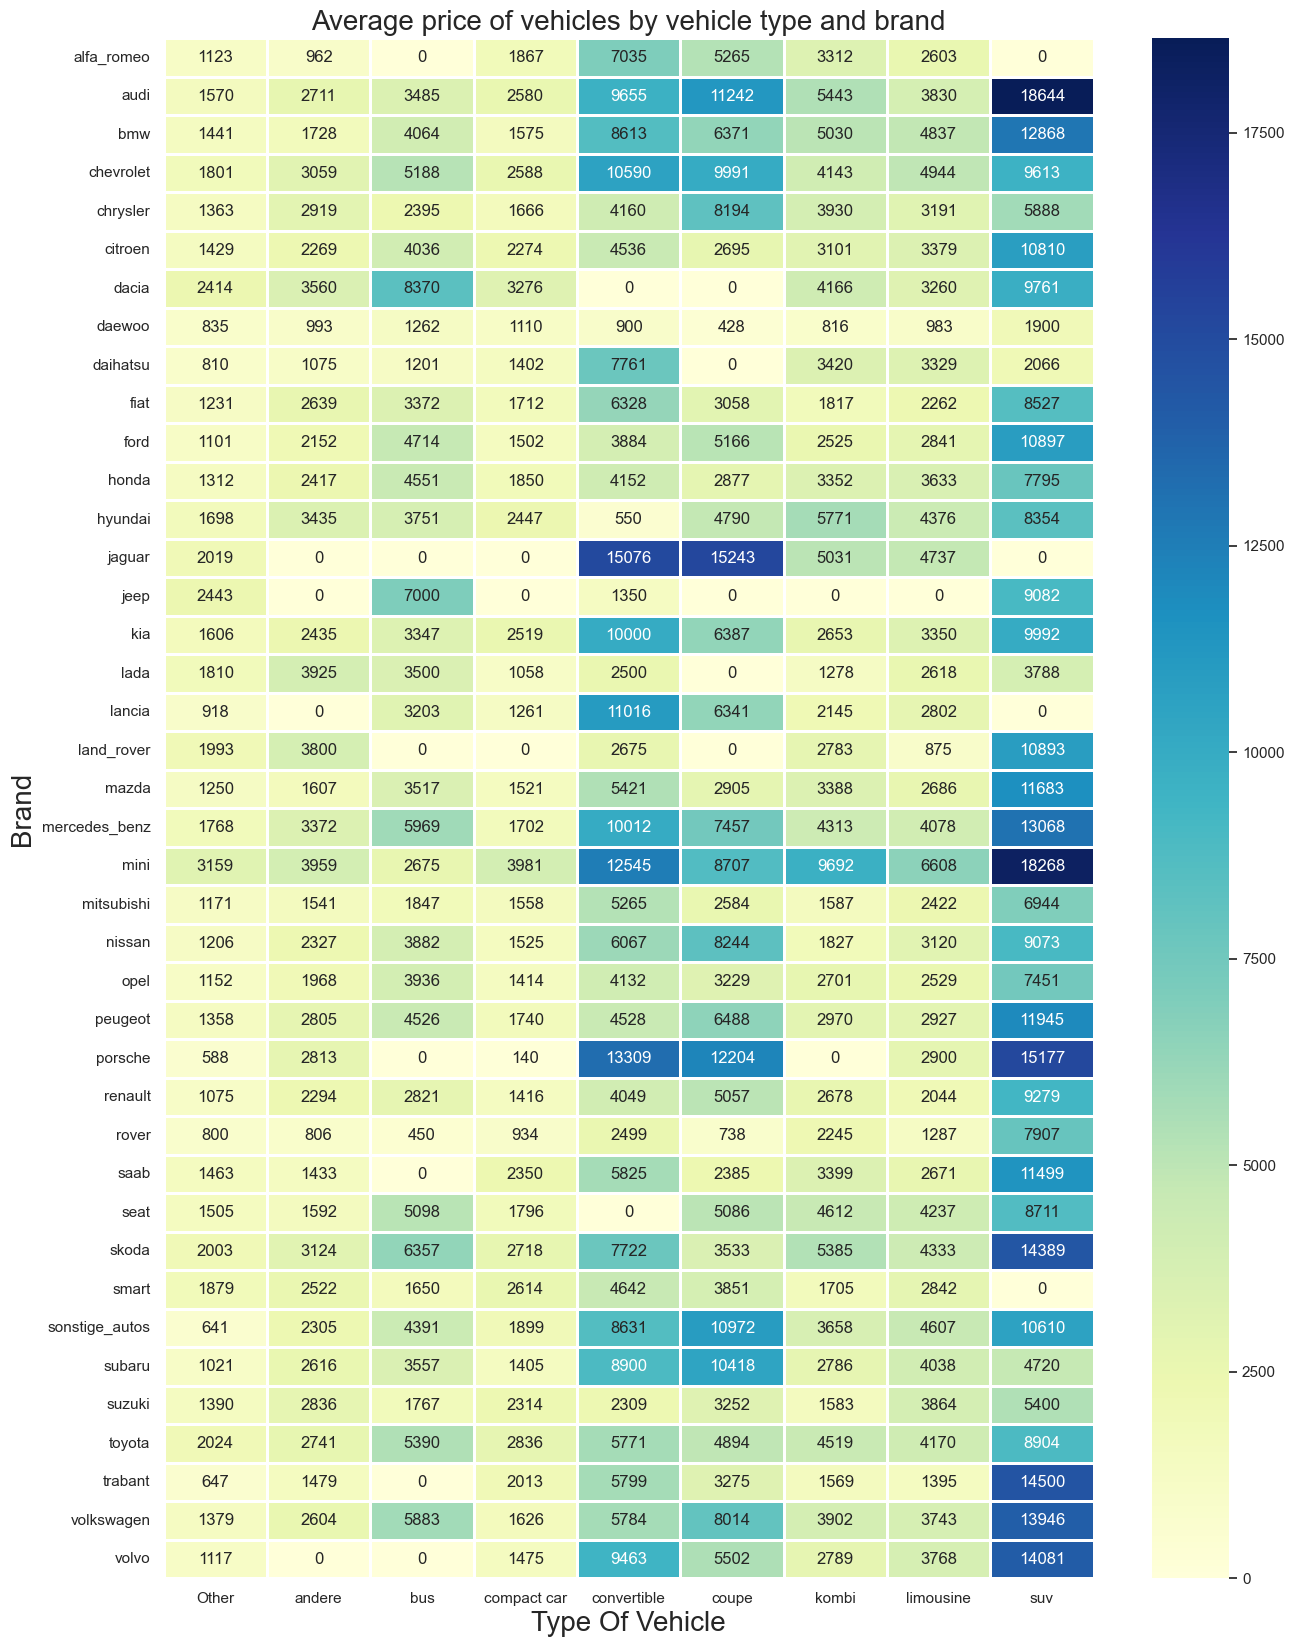

In [18]:
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

In [19]:
df.to_excel('cleaned_autos.xlsx')